In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("KcHouseData").master("local[*]").getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/18 20:40:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark import SparkFiles
 
url = "https://dysk.agh.edu.pl/s/nWNWeirnCJDQycp/download/kc_house_data.csv.gz"
spark.sparkContext.addFile(url)
 
df = spark.read.csv(SparkFiles.get("kc_house_data.csv.gz"), header=True, inferSchema=True)
df.show(5)


+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000|221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000|538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|   

In [3]:
pdf = df.toPandas()
print(pdf.info())
pdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int32  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int32  
 6   sqft_lot       21613 non-null  int32  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int32  
 9   view           21613 non-null  int32  
 10  condition      21613 non-null  int32  
 11  grade          21613 non-null  int32  
 12  sqft_above     21613 non-null  int32  
 13  sqft_basement  21613 non-null  int32  
 14  yr_built       21613 non-null  int32  
 15  yr_renovated   21613 non-null  int32  
 16  zipcode        21613 non-null  int32  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
from pyspark.sql.functions import to_timestamp, unix_timestamp

df2 = df.withColumn("date", to_timestamp("date", "yyyyMMdd'T'HHmmss"))
df2.show(5)

df2 = df2.withColumn("unixdate", unix_timestamp("date"))
df2 = df2.drop("date")

df2 = df2.drop("id")

pdf = df2.toPandas()
print(pdf.info())
pdf.head()

+----------+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|               date|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|2014-10-13 00:00:00|221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|2014-12-09 00:00:00|538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      21

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unixdate
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1413158400
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1418083200
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1424822400
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1418083200
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1424217600


In [5]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in df2.columns if col != "price"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

df_assembled = assembler.transform(df2)

lr = LinearRegression()\
    .setMaxIter(100)\
    .setRegParam(3.0)\
    .setElasticNetParam(0.5)\
    .setFeaturesCol("features")\
    .setLabelCol("price")

model = lr.fit(df_assembled)

print(f'RMSE: {model.summary.rootMeanSquaredError}')
print(f'r2: {model.summary.r2}')
print(f'iterations: {model.summary.totalIterations}')

25/04/18 20:40:42 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/04/18 20:40:42 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


RMSE: 200735.27852107986
r2: 0.7010253344728111
iterations: 37


In [6]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

df_train,df_test = df2.randomSplit([0.7,0.3],seed=1)

va = VectorAssembler(inputCols=feature_columns, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="price")

In [7]:
pipeline = Pipeline(stages=[va,lr])

model = pipeline.fit(df_train)
 
df_train_pred = model.transform(df_train)
df_test_pred = model.transform(df_test)

25/04/18 20:40:43 WARN Instrumentation: [b83f2cb4] regParam is zero, which might cause numerical instability and overfitting.
25/04/18 20:40:43 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [8]:
evaluator = RegressionEvaluator() \
                .setLabelCol("price") \
                .setPredictionCol("prediction") \
                .setMetricName("rmse"); 

In [9]:
rmse_train = evaluator.evaluate(df_train_pred)
rmse_test = evaluator.evaluate(df_test_pred)

evaluator = evaluator.setMetricName("r2")
r2_train = evaluator.evaluate(df_train_pred)
r2_test = evaluator.evaluate(df_test_pred)

print("Training set metrics:")
print(f"RMSE: {rmse_train}")
print(f"R2: {r2_train}")
print("\nTest set metrics:")
print(f"RMSE: {rmse_test}") 
print(f"R2: {r2_test}")


Training set metrics:
RMSE: 204884.06335471442
R2: 0.6979612253935805

Test set metrics:
RMSE: 191057.84301260885
R2: 0.7077385385431436


### 2.5

In [10]:
def evaluate_model_with_test_size(df, k):
    count = df.count()
    test_size = 1 - k * len(df.columns) / count
    
    train_size = 1 - test_size
    df_train, df_test = df.randomSplit([train_size, test_size], seed=42)
    
    feature_columns = [col for col in df.columns if col != "price"]
    va = VectorAssembler(inputCols=feature_columns, outputCol="features")
    lr = LinearRegression(featuresCol="features", labelCol="price", regParam=0.1, solver="l-bfgs")
    
    pipeline = Pipeline(stages=[va, lr])
    model = pipeline.fit(df_train)
    
    df_train_pred = model.transform(df_train)
    df_test_pred = model.transform(df_test)
    
    evaluator = RegressionEvaluator() \
                .setLabelCol("price") \
                .setPredictionCol("prediction")
    
    evaluator.setMetricName("rmse")
    rmse_train = evaluator.evaluate(df_train_pred)
    rmse_test = evaluator.evaluate(df_test_pred)
    
    evaluator.setMetricName("r2")
    r2_train = evaluator.evaluate(df_train_pred)
    r2_test = evaluator.evaluate(df_test_pred)
    
    return {
        "k": k,
        "test_size": test_size,
        "train_size": train_size,
        "train_count": df_train.count(),
        "test_count": df_test.count(),
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "r2_train": r2_train,
        "r2_test": r2_test
    }


In [11]:
import pandas as pd

k_values = list(range(1, 11)) + list(range(20, 101, 10)) + list(range(200, 301, 100))

results = []
for k in k_values:
    print(f"Evaluating model with k={k}")
    result = evaluate_model_with_test_size(df2, k)
    results.append(result)
    
results_df = pd.DataFrame(results)

pd.set_option('display.precision', 4)
display(results_df[['k', 'test_size', 'train_size', 'train_count', 'test_count', 
                   'rmse_train', 'rmse_test', 'r2_train', 'r2_test']])

Evaluating model with k=1
Evaluating model with k=2
Evaluating model with k=3
Evaluating model with k=4
Evaluating model with k=5
Evaluating model with k=6
Evaluating model with k=7
Evaluating model with k=8
Evaluating model with k=9
Evaluating model with k=10
Evaluating model with k=20
Evaluating model with k=30
Evaluating model with k=40
Evaluating model with k=50
Evaluating model with k=60
Evaluating model with k=70
Evaluating model with k=80
Evaluating model with k=90
Evaluating model with k=100
Evaluating model with k=200
Evaluating model with k=300


,k,test_size,train_size,train_count,test_count,rmse_train,rmse_test,r2_train,r2_test
0,1,0.9991,0.0009,20,21593,12009.0639,661868.5099,0.9934,-2.2478
1,2,0.9981,0.0019,43,21570,116571.4850,290633.9713,0.7928,0.3739
2,3,0.9972,0.0028,62,21551,124088.0215,285458.5708,0.7905,0.3962
3,4,0.9963,0.0037,79,21534,128766.5988,268999.5258,0.7804,0.4640
4,5,0.9954,0.0046,103,21510,140878.4231,225124.7898,0.7641,0.6246
5,6,0.9944,0.0056,122,21491,195411.4671,221405.8309,0.7391,0.6361
6,7,0.9935,0.0065,144,21469,191747.9752,219222.9640,0.7640,0.6430
7,8,0.9926,0.0074,161,21452,186926.5510,219744.5422,0.7596,0.6415
8,9,0.9917,0.0083,183,21430,184040.3799,216342.3007,0.7462,0.6528
9,10,0.9907,0.0093,223,21390,181233.2332,220298.9215,0.7314,0.6403


Results trimmed to k=50 and train size=0.0463


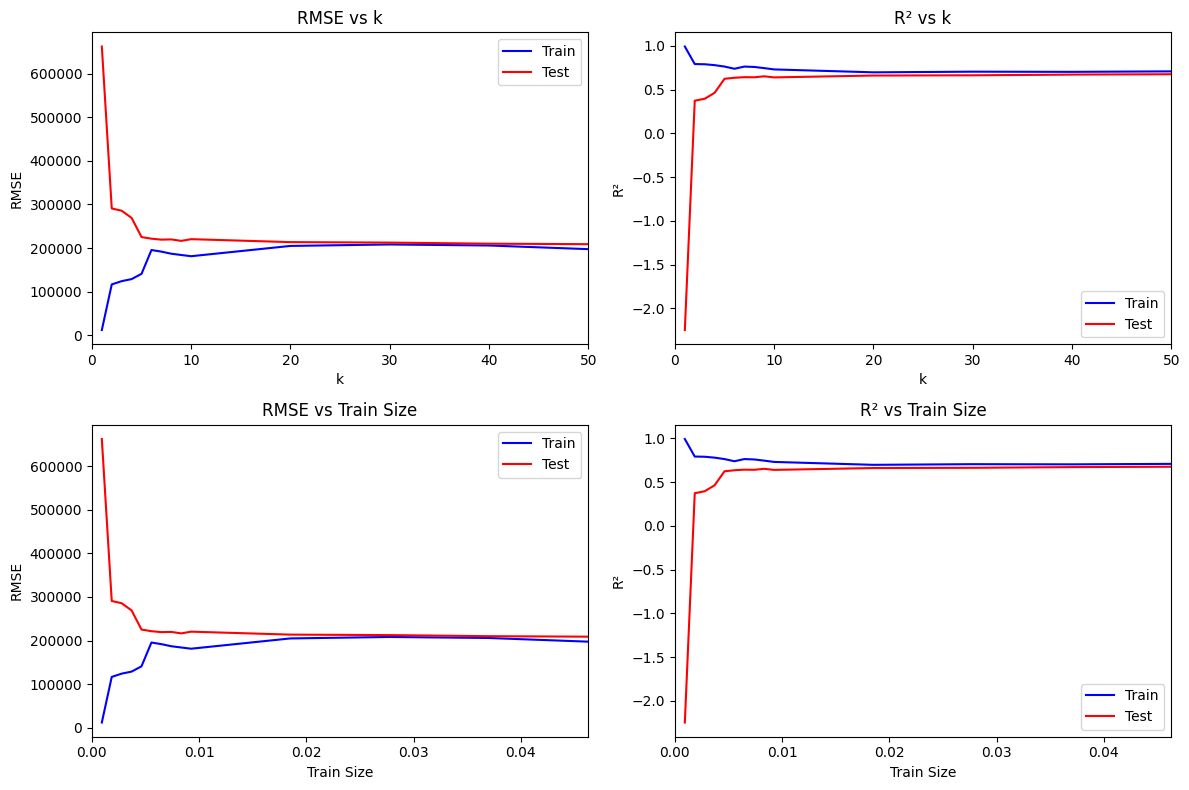

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(results_df['k'], results_df['rmse_train'], 'b-', label='Train')
plt.plot(results_df['k'], results_df['rmse_test'], 'r-', label='Test')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs k')
plt.xlim(0, 50)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(results_df['k'], results_df['r2_train'], 'b-', label='Train')
plt.plot(results_df['k'], results_df['r2_test'], 'r-', label='Test')
plt.xlabel('k')
plt.ylabel('R²')
plt.title('R² vs k')
plt.xlim(0, 50)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(results_df['train_size'], results_df['rmse_train'], 'b-', label='Train')
plt.plot(results_df['train_size'], results_df['rmse_test'], 'r-', label='Test')
plt.xlabel('Train Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Train Size')
plt.xlim(0, 0.0463)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(results_df['train_size'], results_df['r2_train'], 'b-', label='Train')
plt.plot(results_df['train_size'], results_df['r2_test'], 'r-', label='Test')
plt.xlabel('Train Size')
plt.ylabel('R²')
plt.title('R² vs Train Size')
plt.xlim(0, 0.0463)
plt.legend()

print("Results trimmed to k=50 and train size=0.0463")

plt.tight_layout()
plt.show()

In [13]:
def evaluate_metrics(df, metrics=['r2','rmse','mse','mae'], label_col='price', prediction_col='prediction'):
    """
    Funkcja oblicza metryki regresji na podstawie zbioru danych zawierającego prawdziwe wartosci etykiet 
    i wartości przewidywane
    :param df: Dataset<Row> wejściowy zbiór danych
    :param metrics: lista metryk do obliczenia
    :param label_col: nazwa kolumny z wartosciami ściowymi
    :param prediction_col: nazwa kolumny zawierającej przewidywane wartosci
    :return: słownik zawierajacy pary (nazwa_metryki,wartosc) 
    """
    results = {}
    evaluator = RegressionEvaluator(labelCol=label_col, predictionCol=prediction_col)
    
    for metric in metrics:
        evaluator.setMetricName(metric)
        value = evaluator.evaluate(df)
        results[metric] = value
    
    return results


In [14]:

def train_and_test(df, lr=LinearRegression()
                          .setMaxIter(100)
                          .setRegParam(3.0)
                          .setElasticNetParam(0.5)
                          .setFeaturesCol("features")
                          .setLabelCol("price")):
    """
    Funkcja (1) dzieli zbiór danych na ``df_train`` oraz ``df_test`` 
    (2) tworzy ciag przetwarzania zawierający ``VectorAssembler`` 
    i  przekazaną jako parametr konfiguracje algorytmu regresji
    (3) buduje model i dokonuje predykcji dla ``df_train`` oraz ``df_test``
    (4) wyświetla metryki
    :param df: wejściowy zbiór danych
    :param lr: konfiguracja algorytmu regresji
    :return: model zwrócony przez ``pipeline.fit()``
    """
    df_train, df_test = df.randomSplit([0.7, 0.3], seed=42)
    
    feature_columns = [col for col in df.columns if col != "price"]
    
    va = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    pipeline = Pipeline(stages=[va, lr])
    
    model = pipeline.fit(df_train)
    
    df_train_pred = model.transform(df_train)
    df_test_pred = model.transform(df_test)
    
    train_metrics = evaluate_metrics(df_train_pred)
    test_metrics = evaluate_metrics(df_test_pred)
    
    print("Training metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTest metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")
    
    return model

In [15]:
model = train_and_test(df2)

feature_columns = [col for col in df2.columns if col != "price"]
coefficients = model.stages[1].coefficients
intercept = model.stages[1].intercept

print("\nRegression Equation:")
print("price=")
for i, feature in enumerate(feature_columns):
    print(f"\t+ {feature} * {coefficients[i]}")
print(f"\t + {intercept}")

Training metrics:
r2: 0.7011370123267342
rmse: 203835.99597113737
mse: 41549113253.54553
mae: 127516.07498030366

Test metrics:
r2: 0.6988083723886873
rmse: 193790.55523139852
mse: 37554779296.89372
mae: 126036.77207436853

Regression Equation:
price=
	+ bedrooms * -42931.132714787076
	+ bathrooms * 38359.60171764651
	+ sqft_living * 97.86900818009208
	+ sqft_lot * 0.09217839628370283
	+ floors * 7471.381802082133
	+ waterfront * 561099.8323767176
	+ view * 55123.973108348386
	+ condition * 30190.961446204383
	+ grade * 93304.10198974432
	+ sqft_above * 96.40574812306485
	+ sqft_basement * 62.18561553575504
	+ yr_built * -2606.1620207140945
	+ yr_renovated * 20.362116072593818
	+ zipcode * -594.7190132279966
	+ lat * 603816.2746430469
	+ long * -224664.6815525454
	+ sqft_living15 * 25.101679486546228
	+ sqft_lot15 * -0.3783260595710462
	+ unixdate * 0.0013843082327466242
	 + 4649778.974893724


In [16]:
stats = {}
for feature in ['sqft_living', 'waterfront', 'unixdate']:
    stats[feature] = {
        'min': df2.agg({feature: 'min'}).collect()[0][0],
        'max': df2.agg({feature: 'max'}).collect()[0][0],
        'mean': df2.agg({feature: 'mean'}).collect()[0][0]
    }

sqft_impact = coefficients[feature_columns.index('sqft_living')]
print(f"\nImpact of living space:")
print(f"Price increases by ${sqft_impact:.2f} per square foot")

waterfront_impact = coefficients[feature_columns.index('waterfront')]
print(f"\nWaterfront impact:")
print(f"Waterfront homes are ${waterfront_impact:,.2f} more expensive")

seconds_per_month = 30 * 24 * 60 * 60
time_impact = coefficients[feature_columns.index('unixdate')] * seconds_per_month
print(f"\nTime impact:")
print(f"Prices changed by ${time_impact:,.2f} per month")
total_months = (stats['unixdate']['max'] - stats['unixdate']['min']) / seconds_per_month
total_time_impact = time_impact * total_months
print(f"Over the full period ({total_months:.1f} months): ${total_time_impact:,.2f}")


Impact of living space:
Price increases by $97.87 per square foot

Waterfront impact:
Waterfront homes are $561,099.83 more expensive

Time impact:
Prices changed by $3,588.13 per month
Over the full period (13.0 months): $46,645.65


In [17]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
 
cols = df2.columns
cols.remove('price')
va=VectorAssembler().setInputCols(cols).setOutputCol("features")
lr=LinearRegression()\
                      .setMaxIter(100)\
                      .setRegParam(1) \
                      .setElasticNetParam(0.5) \
                      .setFeaturesCol("features")\
                      .setLabelCol("price")
 
pipeline = Pipeline(stages=[va,lr])
 
 
evaluator = RegressionEvaluator(metricName='r2',labelCol='price')
 
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps = ParamGridBuilder().build(),
                          evaluator=evaluator,
                          numFolds=5)
 
# Train the model using cross-validation
df_train,df_test = df2.randomSplit([0.9, 0.1],seed=1)
 
cvModel = crossval.fit(df_train)
print(f'AVG r2 {cvModel.avgMetrics}')


AVG r2 [np.float64(0.7003314367957669)]


In [18]:
df_train_pred = cvModel.transform(df_train)
df_test_pred = cvModel.transform(df_test)

# Calculate metrics for both sets
train_r2 = evaluator.evaluate(df_train_pred)
test_r2 = evaluator.evaluate(df_test_pred)

print(f"Cross-validation average R²: {cvModel.avgMetrics[0]}")
print(f"Training set R²: {train_r2}")
print(f"Test set R²: {test_r2}")

Cross-validation average R²: 0.7003314367957669
Training set R²: 0.7019130804498397
Test set R²: 0.6910175526745853


To normalne, że wartość R² dla całego zbioru danych różni się od średniej wartości R² uzyskanej podczas walidacji krzyżowej. 


In [19]:
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 1, 3, 5]) \
    .addGrid(lr.elasticNetParam, [0, 0.5, 1]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5, 
                          parallelism=4)

df_train, df_test = df2.randomSplit([0.9, 0.1], seed=0)
cvModel = crossval.fit(df_train)

print('\nAll R² values:')
for metrics in cvModel.avgMetrics:
    print(f'{metrics}')

bestModel = cvModel.bestModel
bestRegParam = bestModel.stages[1].getRegParam()
bestElasticNetParam = bestModel.stages[1].getElasticNetParam()

print(f'\nBest model parameters:')
print(f'regParam: {bestRegParam}')
print(f'elasticNetParam: {bestElasticNetParam}')

df_test_pred = bestModel.transform(df_test)

r2_evaluator = RegressionEvaluator(metricName='r2', labelCol='price', predictionCol='prediction')
rmse_evaluator = RegressionEvaluator(metricName='rmse', labelCol='price', predictionCol='prediction')
mae_evaluator = RegressionEvaluator(metricName='mae', labelCol='price', predictionCol='prediction')
mse_evaluator = RegressionEvaluator(metricName='mse', labelCol='price', predictionCol='prediction')

test_r2 = r2_evaluator.evaluate(df_test_pred)
test_rmse = rmse_evaluator.evaluate(df_test_pred)
test_mae = mae_evaluator.evaluate(df_test_pred)
test_mse = mse_evaluator.evaluate(df_test_pred)

print("\nTest set metrics:")
print(f"R²: {test_r2}")
print(f"RMSE: {test_rmse}")


All R² values:
0.6987828957701574
0.6987829258456095
0.6987829373398368
0.6987829083525566
0.698782881107365
0.6987828887156502
0.6987829362897708
0.6987828731607092
0.6987833904743614
0.6987829641968106
0.6987832680119699
0.6987833390053858

Best model parameters:
regParam: 3.0
elasticNetParam: 1.0

Test set metrics:
R²: 0.7091675432118582
RMSE: 202139.15351714013


In [20]:
import numpy as np

n = len(df2.columns)
rs = np.eye(n)
 
for i in range(n):
    for j in range(n):
        r = df2.stat.corr(df2.columns[i], df2.columns[j])
        rs[i, j] = r

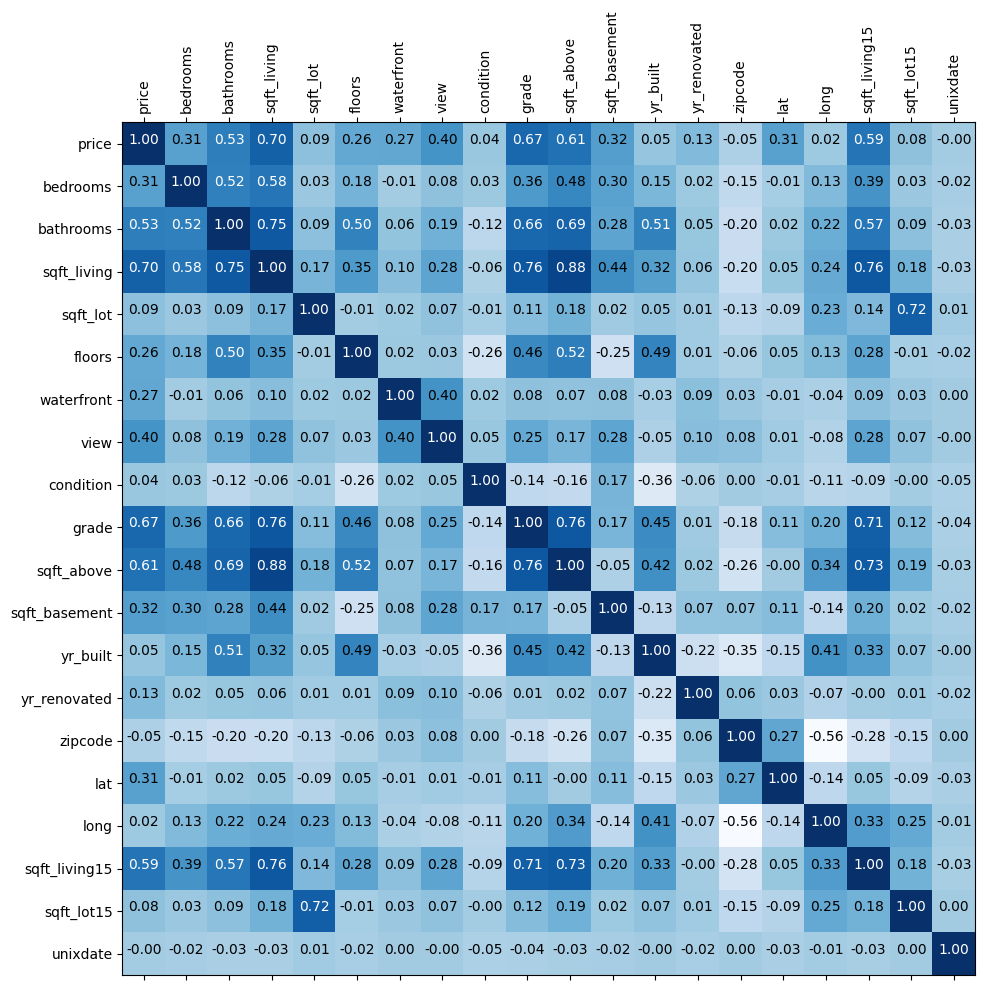

In [21]:
import itertools
import matplotlib.pyplot as plt
 
def plot_matrix(cm, labels,
                    normalize=False,
                    title='',
                    cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.matshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(labels)
    # ax.set_yticklabels(['']+labels)
    ax.set_yticklabels(labels)
 
    fmt = '.2f' #if normalize else 'd'
    thresh = 0.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.show()
 
plot_matrix(rs,labels=df2.columns)


In [22]:
price_idx = df2.columns.index('price')

weak_price_corr_threashold = 0.1
collinear_threashold = 0.7

weak_price_corr = [df2.columns[i] for i in range(n) if np.abs(rs[i, price_idx]) < weak_price_corr_threashold and df2.columns[i] != 'price']

collinear_cols = []
for i in range(n):
    for j in range(i+1, n):
        if df2.columns[i] == 'price' or df2.columns[j] == 'price':
            continue
        if np.abs(rs[i, j]) > collinear_threashold:
            if np.abs(rs[i, price_idx]) < np.abs(rs[j, price_idx]):
                collinear_cols.append(df2.columns[i])
            else:
                collinear_cols.append(df2.columns[j])

columns_to_remove = list(set(weak_price_corr + collinear_cols))

print("Columns with weak correlation to price:", weak_price_corr)
print("Highly collinear columns:", collinear_cols)
print("All columns to remove:", columns_to_remove)

Columns with weak correlation to price: ['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15', 'unixdate']
Highly collinear columns: ['bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_living15', 'sqft_living15']
All columns to remove: ['zipcode', 'bathrooms', 'yr_built', 'condition', 'sqft_lot15', 'grade', 'sqft_above', 'sqft_living15', 'long', 'sqft_lot', 'unixdate']


In [23]:
df3 = df2
for col in columns_to_remove:
    df3 = df3.drop(col)

print("\nRemaining columns:", df3.columns)
print()

def train_and_test(df):
    df_train, df_test = df.randomSplit([0.7, 0.3], seed=0)
    
    feature_columns = [col for col in df.columns if col != "price"]
    
    va = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    lr = LinearRegression() \
        .setMaxIter(100) \
        .setRegParam(0.1) \
        .setElasticNetParam(0.5) \
        .setFeaturesCol("features") \
        .setLabelCol("price")
    
    pipeline = Pipeline(stages=[va, lr])
    
    model = pipeline.fit(df_train)
    
    df_train_pred = model.transform(df_train)
    df_test_pred = model.transform(df_test)
    
    evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction")
    
    metrics = {}
    for metric_name in ["rmse", "r2", "mae", "mse"]:
        evaluator = evaluator.setMetricName(metric_name)
        train_metric = evaluator.evaluate(df_train_pred)
        test_metric = evaluator.evaluate(df_test_pred)
        metrics[f"train_{metric_name}"] = train_metric
        metrics[f"test_{metric_name}"] = test_metric
    
    print("Training metrics:")
    print(f"RMSE: {metrics['train_rmse']}")
    print(f"R²: {metrics['train_r2']}")
    
    print("\nTest metrics:")
    print(f"RMSE: {metrics['test_rmse']}")
    print(f"R²: {metrics['test_r2']}")
    
    return model

model = train_and_test(df3)

print("\n--- Original Dataset Results ---")
original_model = train_and_test(df2)


Remaining columns: ['price', 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_basement', 'yr_renovated', 'lat']

Training metrics:
RMSE: 225793.06955913396
R²: 0.6333564633103008

Test metrics:
RMSE: 211140.01995619442
R²: 0.6429975124501965

--- Original Dataset Results ---
Training metrics:
RMSE: 204515.56790377357
R²: 0.6992015713824427

Test metrics:
RMSE: 192108.62746141263
R²: 0.7044548314952062


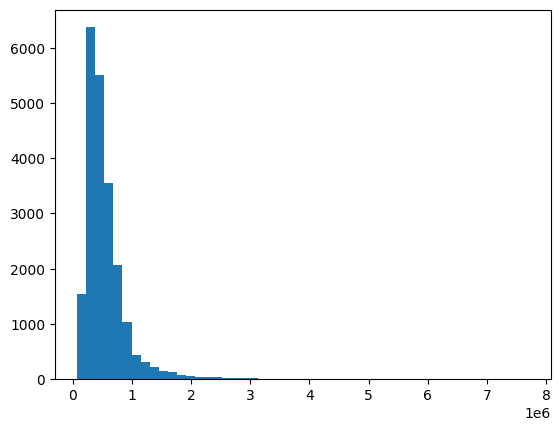

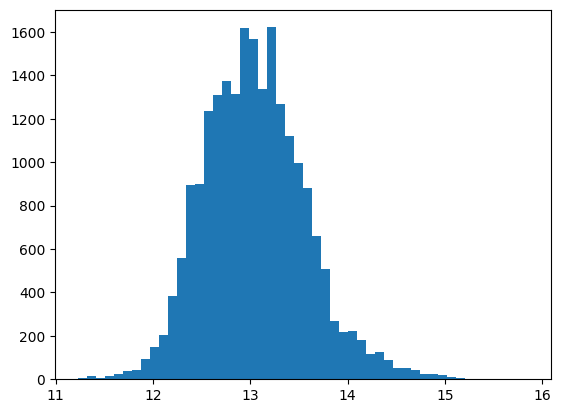

In [24]:
plt.hist(df2.toPandas()['price'],bins=50)
plt.show()
 
plt.hist(np.log(df2.toPandas()['price']),bins=50)
plt.show()

In [25]:
from pyspark.sql.functions import log

df3 = df2.withColumn("logprice", log("price"))

n = len(df3.columns)
rs_log = np.eye(n)

for i in range(n):
    for j in range(n):
        r = df3.stat.corr(df3.columns[i], df3.columns[j])
        rs_log[i, j] = r


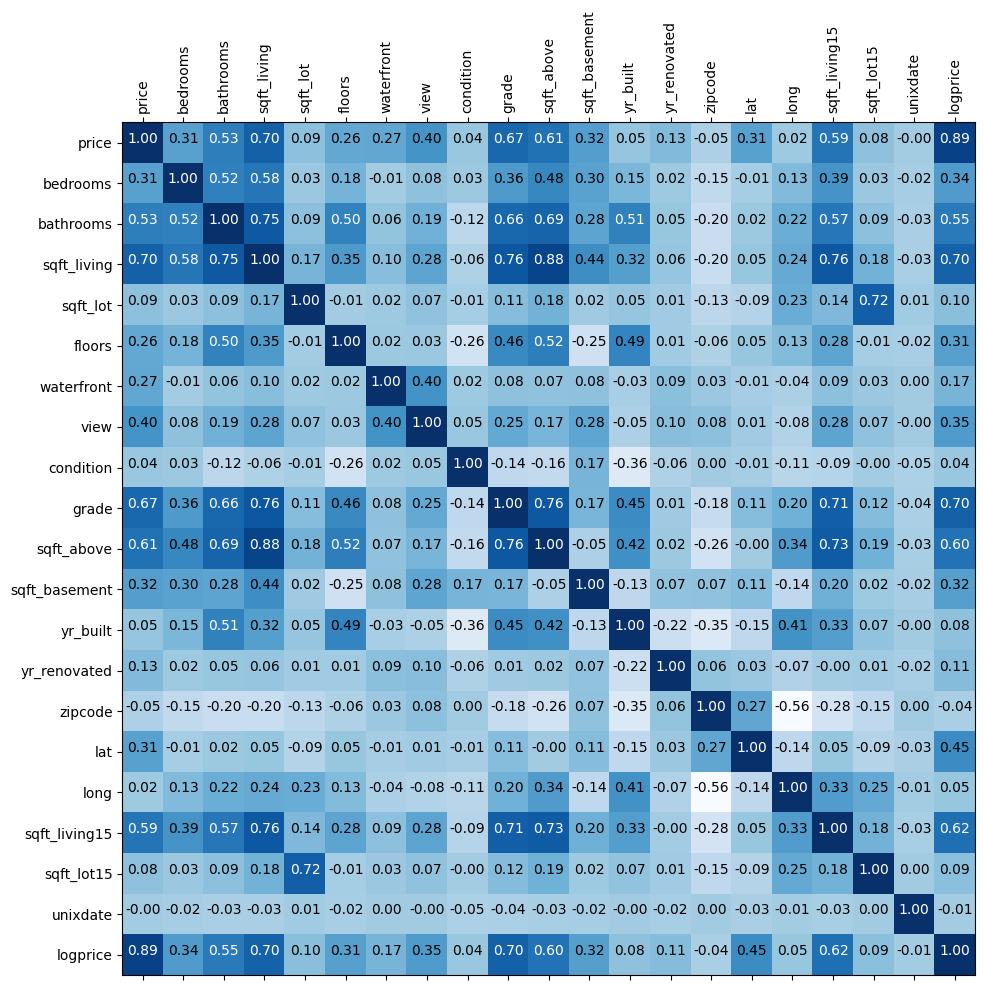

In [26]:
plot_matrix(rs_log,labels=df3.columns)

In [27]:
price_idx = df3.columns.index('price')
logprice_idx = df3.columns.index('logprice')

print("Feature correlations comparison:")
print("{:<20} {:>15} {:>15}".format("Feature", "Corr with price", "Corr with logprice"))
for i in range(n):
    if df3.columns[i] not in ['price', 'logprice']:
        print("{:<20} {:>15.3f} {:>15.3f}".format(
            df3.columns[i], 
            rs_log[i, price_idx],
            rs_log[i, logprice_idx]
        ))


Feature correlations comparison:
Feature              Corr with price Corr with logprice
bedrooms                       0.308           0.344
bathrooms                      0.525           0.551
sqft_living                    0.702           0.695
sqft_lot                       0.090           0.100
floors                         0.257           0.311
waterfront                     0.266           0.175
view                           0.397           0.347
condition                      0.036           0.040
grade                          0.667           0.704
sqft_above                     0.606           0.602
sqft_basement                  0.324           0.317
yr_built                       0.054           0.081
yr_renovated                   0.126           0.114
zipcode                       -0.053          -0.038
lat                            0.307           0.449
long                           0.022           0.050
sqft_living15                  0.585           0.619
sqft_lot15

In [28]:
from pyspark.sql.functions import exp

def train_and_test_log(df):
    df_train, df_test = df.randomSplit([0.7, 0.3], seed=42)
    
    feature_columns = [col for col in df.columns if col not in ["price", "logprice"]]
    
    va = VectorAssembler(inputCols=feature_columns, outputCol="features")
    
    lr = LinearRegression() \
        .setMaxIter(100) \
        .setRegParam(0.1) \
        .setElasticNetParam(0.5) \
        .setFeaturesCol("features") \
        .setLabelCol("logprice")
    
    pipeline = Pipeline(stages=[va, lr])
    
    model = pipeline.fit(df_train)
    
    df_train_pred = model.transform(df_train)
    df_test_pred = model.transform(df_test)
    
    df_train_pred = df_train_pred.withColumn("exp_pred", exp("prediction"))
    df_test_pred = df_test_pred.withColumn("exp_pred", exp("prediction"))
    
    log_evaluator = RegressionEvaluator(labelCol="logprice", predictionCol="prediction")
    
    log_metrics = {}
    for metric_name in ["rmse", "r2"]:
        log_evaluator = log_evaluator.setMetricName(metric_name)
        train_metric = log_evaluator.evaluate(df_train_pred)
        test_metric = log_evaluator.evaluate(df_test_pred)
        log_metrics[f"train_log_{metric_name}"] = train_metric
        log_metrics[f"test_log_{metric_name}"] = test_metric
    
    price_evaluator = RegressionEvaluator(labelCol="price", predictionCol="exp_pred")
    
    original_metrics = {}
    for metric_name in ["rmse", "r2"]:
        price_evaluator = price_evaluator.setMetricName(metric_name)
        train_metric = price_evaluator.evaluate(df_train_pred)
        test_metric = price_evaluator.evaluate(df_test_pred)
        original_metrics[f"train_{metric_name}"] = train_metric
        original_metrics[f"test_{metric_name}"] = test_metric
    
    print("Log-scale metrics (on log-transformed price):")
    print(f"Training RMSE: {log_metrics['train_log_rmse']}")
    print(f"Training R²: {log_metrics['train_log_r2']}")
    
    print(f"Test RMSE: {log_metrics['test_log_rmse']}")
    print(f"Test R²: {log_metrics['test_log_r2']}")
    
    print("\nOriginal-scale metrics (after exponential transformation):")
    print(f"Training RMSE: {original_metrics['train_rmse']}")
    print(f"Training R²: {original_metrics['train_r2']}")
    
    print(f"Test RMSE: {original_metrics['test_rmse']}")
    print(f"Test R²: {original_metrics['test_r2']}")
    
    return model

log_model = train_and_test_log(df3)

Log-scale metrics (on log-transformed price):
Training RMSE: 0.28885367015004315
Training R²: 0.7030040794912567
Test RMSE: 0.28572600768839107
Test R²: 0.6963201711309361

Original-scale metrics (after exponential transformation):
Training RMSE: 222635.97472748917
Training R²: 0.6434659135626188
Test RMSE: 225060.54774022146
Test R²: 0.5937658548334686


In [29]:
from pyspark.ml.regression import GeneralizedLinearRegression

df4 = df2

feature_columns = [col for col in df4.columns if col != "price"]
va = VectorAssembler(inputCols=feature_columns, outputCol="features")

glr = GeneralizedLinearRegression(family="gaussian", 
                                 link="log", 
                                 maxIter=100, 
                                 regParam=0.1,
                                 featuresCol="features",
                                 labelCol="price")

df_train, df_test = df4.randomSplit([0.7, 0.3], seed=42)

pipeline = Pipeline(stages=[va, glr])
glr_model = pipeline.fit(df_train)

df_train_pred = glr_model.transform(df_train)
df_test_pred = glr_model.transform(df_test)

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction")

print("\nGLR Model Results:")
print("Training metrics:")
for metric_name in ["rmse", "r2"]:
    evaluator = evaluator.setMetricName(metric_name)
    train_metric = evaluator.evaluate(df_train_pred)
    print(f"{metric_name}: {train_metric}")

print("\nTest metrics:")
for metric_name in ["rmse", "r2"]:
    evaluator = evaluator.setMetricName(metric_name)
    test_metric = evaluator.evaluate(df_test_pred)
    print(f"{metric_name}: {test_metric}")

print("\nGLR Coefficients:")
coefficients = glr_model.stages[1].coefficients
for i, feature in enumerate(feature_columns):
    print(f"{feature}: {coefficients[i]}")


GLR Model Results:
Training metrics:
rmse: 200902.06311491397
r2: 0.7096785210671073

Test metrics:
rmse: 204657.356586001
r2: 0.6640826759334069

GLR Coefficients:
bedrooms: -0.007820205727703604
bathrooms: 0.03159276114737329
sqft_living: 8.106601227964808e-05
sqft_lot: -7.743242220447457e-08
floors: 0.03849410171146783
waterfront: 0.11188077295737398
view: 0.07156768387617371
condition: 0.05295239965221269
grade: 0.1728447121705836
sqft_above: 4.404143777096392e-05
sqft_basement: 3.702720042993495e-05
yr_built: -0.003796164392004515
yr_renovated: 3.2402737764660825e-05
zipcode: -0.000298981921156517
lat: 0.14577221922081948
long: -0.05276960178933337
sqft_living15: 0.00010129970914597139
sqft_lot15: -7.217539067714232e-07
unixdate: 1.8588534880125645e-09


In [32]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd

def compute_vif(df, label_col):
    feature_cols = [col for col in df.columns if col != label_col]
    
    vectorAssembler = VectorAssembler(
        inputCols=feature_cols,
        outputCol="features"
    )
    
    vector_df = vectorAssembler.transform(df)
    
    lr = LinearRegression(featuresCol="features", labelCol=label_col, regParam=0.1, elasticNetParam=0.5)
    
    model = lr.fit(vector_df)
    
    r2 = model.summary.r2
    
    if r2 >= 1.0:
        r2 = r2 - 1e-10
    
    vif = 1.0 / (1.0 - r2)
    
    return vif


In [34]:
from pyspark import SparkFiles

spark = SparkSession.builder.appName("VIF").master("local[*]").getOrCreate()

url = "https://dysk.agh.edu.pl/s/nWNWeirnCJDQycp/download/kc_house_data.csv.gz"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("kc_house_data.csv.gz"), header=True, inferSchema=True)

df2 = df.select('price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15')

df3 = df2.drop('price')
vifs = []
for f in df3.columns:
    vifs.append((f, compute_vif(df3, f)))

vif_df = pd.DataFrame(vifs, columns=['Feature', 'VIF']).sort_values(by='VIF', ascending=False)
print(vif_df)

         Feature         VIF
2    sqft_living  3.4073e+07
6     sqft_above  1.5626e+07
7  sqft_basement  4.7496e+05
5          grade  3.0125e+00
1      bathrooms  2.7973e+00
8  sqft_living15  2.7538e+00
9     sqft_lot15  2.1123e+00
3       sqft_lot  2.0854e+00
4         floors  1.6632e+00
0       bedrooms  1.5290e+00


In [36]:
collinear_features = vif_df[vif_df['VIF'] > 5]['Feature'].tolist()
print(f"\nCollinear features (VIF > 5): {collinear_features}")

features_to_keep = [col for col in df3.columns if col not in collinear_features or col == 'sqft_living']
print(f"\nAttributes after removing collinear (except sqft_living): {features_to_keep}")


Collinear features (VIF > 5): ['sqft_living', 'sqft_above', 'sqft_basement']

Attributes after removing collinear (except sqft_living): ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_living15', 'sqft_lot15']


In [40]:
vectorAssembler = VectorAssembler(
    inputCols=features_to_keep,
    outputCol="features"
)
vector_df = vectorAssembler.transform(df2)
lr = LinearRegression(featuresCol="features", labelCol="price", regParam=0.1, elasticNetParam=0.5)
model = lr.fit(vector_df)
print("\nRegression results after removing collinear attributes:")
print(f"R^2: {model.summary.r2}")
print(f"RMSE: {model.summary.rootMeanSquaredError}")

features_for_model = [col for col in df2.columns if col != 'price']
vectorAssembler = VectorAssembler(
    inputCols=features_for_model,
    outputCol="features"
)
vector_df = vectorAssembler.transform(df2)
lr = LinearRegression(featuresCol="features", labelCol="price", regParam=0.1, elasticNetParam=0.5)
model = lr.fit(vector_df)
print("\nRegression results with all attributes (keeping sqft_living):")
print(f"R^2: {model.summary.r2}")
print(f"RMSE: {model.summary.rootMeanSquaredError}")


Regression results after removing collinear attributes:
R^2: 0.5487383943368911
RMSE: 246615.6895775116

Regression results with all attributes (keeping sqft_living):
R^2: 0.5531597849830141
RMSE: 245404.56469111342


In [45]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

def train_and_test_scaled(df, lr=LinearRegression()
                          .setMaxIter(100)
                          .setRegParam(3.0)
                          .setElasticNetParam(0.5)
                          .setFeaturesCol("features_scaled")
                          .setLabelCol("price"), apply_normalization=False):
    
    feature_cols = [col for col in df.columns if col != 'price']
    
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    
    if apply_normalization:
        scaler = StandardScaler(inputCol="features", outputCol="features_scaled", 
                              withStd=True, withMean=True)
        pipeline = Pipeline(stages=[assembler, scaler, lr])
    else:
        lr = lr.setFeaturesCol("features")
        pipeline = Pipeline(stages=[assembler, lr])
    
    model = pipeline.fit(df)
    
    return model

def print_regression_equation(model, feature_names, apply_normalization=False):
    if apply_normalization:
        lr_model = model.stages[2]
    else:
        lr_model = model.stages[1]
    
    coefficients = lr_model.coefficients
    intercept = lr_model.intercept
    
    equation = f"price = {intercept:.2f}"
    
    for i, coef in enumerate(coefficients):
        equation += f" + ({coef:.4f} * {feature_names[i]})"
    
    print("Regression equation:")
    print(equation)

In [46]:
feature_cols = [col for col in df2.columns if col != 'price']
model_without_scaling = train_and_test_scaled(df2, apply_normalization=False)
print("Model without normalization:")
print_regression_equation(model_without_scaling, feature_cols, apply_normalization=False)

predictions = model_without_scaling.transform(df2)
rsme = model_without_scaling.stages[1].summary.rootMeanSquaredError
r2 = model_without_scaling.stages[1].summary.r2
print(f"RMSE: {rsme}")
print(f"R²: {r2}")

model_with_scaling = train_and_test_scaled(df2, apply_normalization=True)
print("\nModel with normalization:")
print_regression_equation(model_with_scaling, feature_cols, apply_normalization=True)

predictions = model_with_scaling.transform(df2)
rsme = model_with_scaling.stages[2].summary.rootMeanSquaredError
r2 = model_with_scaling.stages[2].summary.r2
print(f"RMSE: {rsme}")
print(f"R²: {r2}")

Model without normalization:
Regression equation:
price = -507920.79 + (-42781.5312 * bedrooms) + (-21971.5300 * bathrooms) + (103.0677 * sqft_living) + (0.0462 * sqft_lot) + (-11711.7993 * floors) + (103006.0611 * grade) + (93.5688 * sqft_above) + (166.7482 * sqft_basement) + (22.9507 * sqft_living15) + (-0.7149 * sqft_lot15)
RMSE: 245404.56482209655
R²: 0.5531597845060179

Model with normalization:
Regression equation:
price = -507920.79 + (-42781.5312 * bedrooms) + (-21971.5300 * bathrooms) + (103.0677 * sqft_living) + (0.0462 * sqft_lot) + (-11711.7993 * floors) + (103006.0611 * grade) + (93.5688 * sqft_above) + (166.7482 * sqft_basement) + (22.9507 * sqft_living15) + (-0.7149 * sqft_lot15)
RMSE: 245404.56482209655
R²: 0.5531597845060179
